# Part II - What affects Loan aotcome status?
## by Alvin Svinurai

## Investigation Overview

I conducted this investigation with the aim of discovering key factors that affect Loan outcome status. The investigation was focused mainly on BorrowerAPR, Term, StatedMonthlyIncome, LoanOriginalAmount, MonthlyLoanPayment, 'ListingCategory', EmploymentStatus, and LoanComencementYear'.


## Dataset Overview

The dataset comprises data on 113937 loans with 81 attributes corresponding to the loan, borrower and lender's details. 61 columns are numeric including the key/id columns and categorical types for ListingCategory. Attributes that were not of interest were dropped leaving 1 column of my creation and 12 original colum, which inlude BorrowerRate, EmploymentStatus, IncomeRange, LoanOriginalAmount.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loan_df = pd.read_csv("prosperLoanData.csv")

In [3]:
loanDataSubset = loan_df[["Term", "LoanStatus", "BorrowerAPR", "ListingCategory (numeric)", "Occupation", 
                               "EmploymentStatus", "DebtToIncomeRatio", "IncomeRange",
                               "StatedMonthlyIncome", "LoanOriginalAmount", "LoanOriginationDate", "MonthlyLoanPayment"
                          ]].copy(deep=True)
loanDataSubset = loan_df[loan_df.StatedMonthlyIncome <= 20000]

## Distribution of LoanStatus


The majority of the Loans are Current, with Completed having the second highest count. We see fewer and fewer loans as the Days Past Due increases.

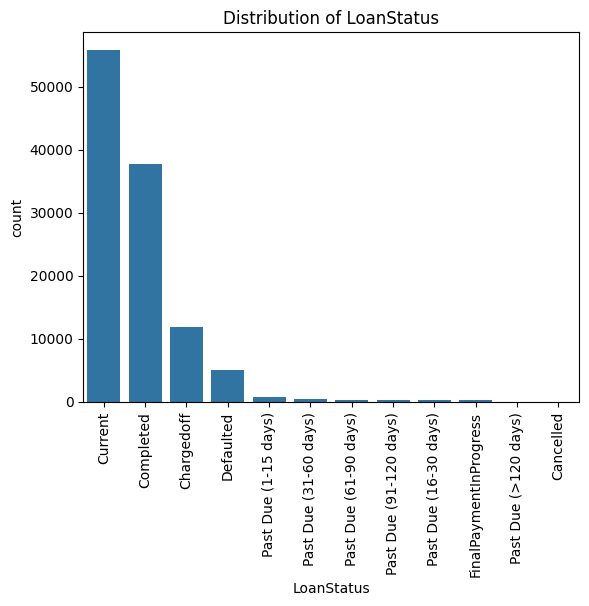

In [4]:
base_color = sb.color_palette()[0]
order = loanDataSubset['LoanStatus'].value_counts().index
sb.countplot(data=loanDataSubset, x='LoanStatus', color=base_color, order=order)
plt.title("Distribution of LoanStatus")
plt.xticks(rotation=90);

## Count of Loan by Term

The are 3 term lengths in the dataset; 1, 3 and 5years. 77% are of 36months(3 years) Term length.


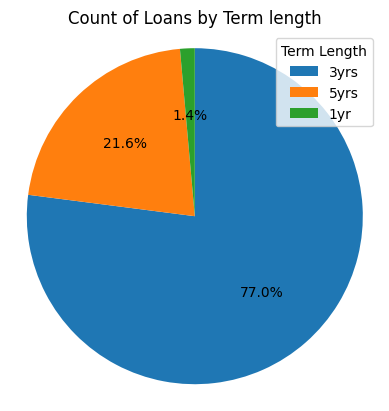

In [13]:
sorted_counts = loanDataSubset['Term'].value_counts()
plt.pie(sorted_counts, autopct='%1.1f%%', startangle = 90, counterclock = False)
plt.legend(title='Term Length', labels = ['3yrs', '5yrs', '1yr'])
plt.title("Count of Loans by Term length")
plt.axis('square');

## Distribution of LoanOriginationYear

The highest number of loans originated in 2013, with the majority of them being in the Current LoanStatus. The highest counts of loans are in the Current and Completed LoanStatus. There is generaly an upward trend in count of loan listing with each successive year, with a sharp drop in 2009. This can be attributed to the Global Reccession of 2008. After 2009, we see a return to the upward trend.

In [38]:
def date_to_year(datetime_obj):
    """Extract year from datetime object"""
    return datetime_obj.year

In [39]:
#Change LoanOriginationDate to datetime and Create a columns with start year for each loan
loanDataSubset['LoanOriginationDate'] = pd.to_datetime(loanDataSubset['LoanOriginationDate'])
loanDataSubset['LoanOriginationYear'] = loanDataSubset['LoanOriginationDate'].apply(date_to_year)

In [40]:
statusYear_counts = loanDataSubset.groupby(["LoanStatus", "LoanOriginationYear"]).size()
statusYear_counts = statusYear_counts.reset_index(name='count')
statusYear_counts = statusYear_counts.pivot(index = 'LoanStatus', columns = 'LoanOriginationYear', values = 'count')

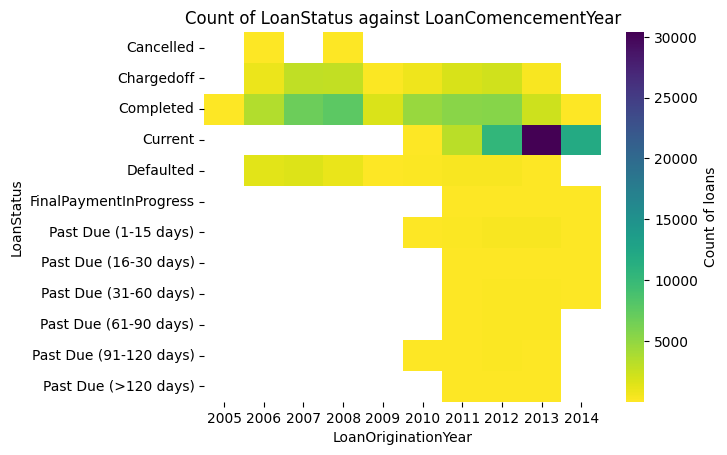

In [41]:
sb.heatmap(statusYear_counts, cmap='viridis_r',  cbar_kws={'label': 'Count of loans'})
plt.title('Count of LoanStatus against LoanComencementYear');

## Distribution of BorrowerAPR

The distribution is unimodal, with an upward trend with multiple peaks. The highest peak is at about 0.36.

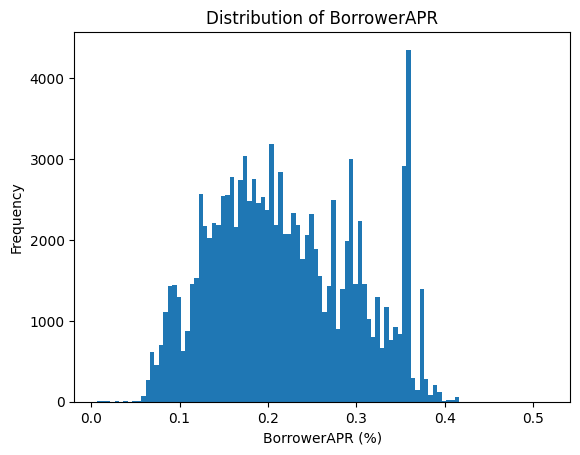

In [23]:
binsize = 0.005
bins = np.arange(loanDataSubset['BorrowerAPR'].min(), loanDataSubset['BorrowerAPR'].max()+binsize, binsize)
plt.hist(data=loanDataSubset, x="BorrowerAPR", bins=bins)
plt.xlabel('BorrowerAPR (%)')
plt.ylabel('Frequency')

plt.title('Distribution of BorrowerAPR');

## Relationship for BorrowerAPR, LoanStatus and Term

There is a consistant pattern accross loan Term for all levels of LoanStatus category, where lower BorrowerAPR are consistantly in the 3 levels; Current, Completed and FinalPaymentInProgress. Higher BorrowerAPR are consistantly 3 levels Defaulted, ChargedOff or Past Due. We can see BorrowerAPR has a negative effect on LoanStatus, the higher it is, the less like the loan in Completed.


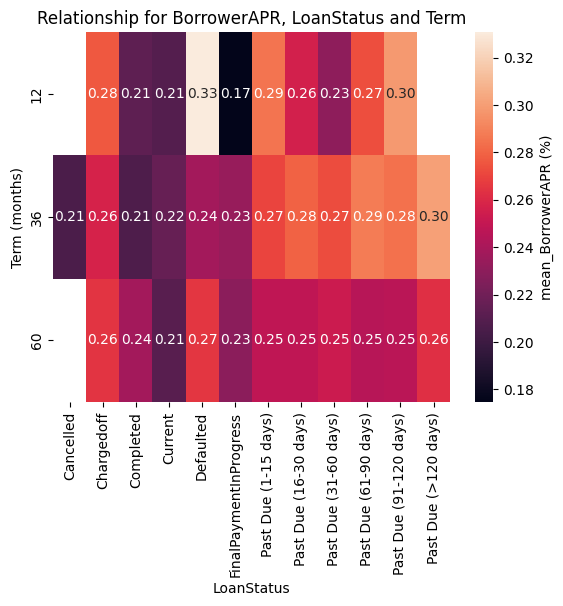

In [34]:
meanBorrowerAPR = loanDataSubset.groupby(['LoanStatus', 'Term'])['BorrowerAPR'].mean()
meanBorrowerAPR = meanBorrowerAPR.reset_index(name = 'AVG_BorrowerAPR')
meanBorrowerAPR = meanBorrowerAPR.pivot(index = 'Term', columns = 'LoanStatus',
                            values = 'AVG_BorrowerAPR')
sb.heatmap(meanBorrowerAPR, annot = True, fmt = '.2f',
           cbar_kws = {'label' : 'mean_BorrowerAPR (%)'})
plt.ylabel("Term (months)")
plt.title("Relationship for BorrowerAPR, LoanStatus and Term");

## Relationship for BorrowerAPR, LoanStatus and Term

The is an Income floor of \\$8,000 for loans above \\$25,000, and they were consistanly in the current status. The highest counts for loans in the Past Due status is below \\$10,000 income and \\$10,000 loan amount.

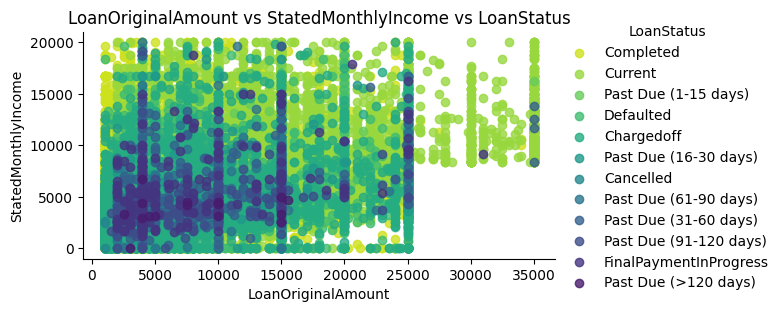

In [31]:
g = sb.FacetGrid(data = loanDataSubset, hue = 'LoanStatus', 
                 palette = 'viridis_r', aspect=2)
g.map(sb.regplot, 'LoanOriginalAmount', 'StatedMonthlyIncome', x_jitter=0.04, fit_reg=False)
g.add_legend()
plt.title('LoanOriginalAmount vs StatedMonthlyIncome vs LoanStatus');